In [ ]:
import pandas as pd
import tweepy
from textblob import TextBlob

In [ ]:
api_key="kff6LbPaycV9pS6OjesR015OC"
api_key_secret="pwNAUqBGEKgbNI8LX7MpMMfeibPUgKhe0OygAqo05Z8suNqePr"
access_token="1155594183840870402-Wh7EnxhlMbY3XyXxIpdNVQLHzzVXQL"
access_token_secret="67ZfDVPkq2TU9x6SteVQhE1lJYaswTVtgBKxXhGmvPQ6A"

In [ ]:
auth=tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)

In [ ]:
keyword="#INEC"


In [ ]:
data=[]

tweets=tweepy.Cursor(api.search_tweets,q=keyword,lang='en',tweet_mode='extended',count=100).items(1500)
for tweet in tweets:
    tweet_text=tweet.full_text
    analysis=TextBlob(tweet_text) 
    sentiment= analysis.sentiment.polarity
    if sentiment > 0:
        sentiment_label="positive"
    elif sentiment < 0:
        sentiment_label="negative"
    else:
        sentiment_label="neutral"
    newdf=pd.DataFrame({'Tweet': tweet_text, 'Sentiment':sentiment_label},index=[0]) 
    data.append(newdf)
df=pd.concat(data,ignore_index=True
            )    
print(df.head(10))

In [ ]:
df.to_csv('election_two.csv',index=False)

In [21]:
First=pd.read_csv("election.csv")
First.head()

,Tweet,Sentiment
0,RT @Bod_repuplic: President Elect H.E Peter Ob...,positive
1,discovered that the power holders from the @Of...,positive
2,RT @Sirodue1: ‼️⚠️ Last Warning ⚠️ to @inecnig...,negative
3,#OCCUPYINEC \n#occupyinec \n#OCCUPYINEC \n#OCC...,neutral
4,RT @strongiess: W.I.T.M out now 🔥🔥🔥 🔊 strongie...,neutral


In [22]:
Second=pd.read_csv("election_two.csv")
Second.head()

,Tweet,Sentiment
0,@EdosaRichard @HelenOlotu @DjfreakyDaboss @off...,positive
1,@PoliceNG it's easy to point guns and killed u...,negative
2,Inaugurating an illegitimate govt of #INEC sel...,neutral
3,@EdosaRichard @HelenOlotu @DjfreakyDaboss @off...,positive
4,@Oluomoofderby @Straw_Chocolait @25tobiloba @z...,negative


In [23]:
df=pd.concat([First,Second])


### Time to analyze the data that has been scrapped
1. Data preprocessing
2. Text preprocessing 
3. visualization and interpretation





In [24]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [26]:
clean_df= []
stop_words =set(stopwords.words("english"))

for tweet in df['Tweet']:
    #remove urls and special characters
    cleaned= re.sub(r"http\S+|[^a-zA-Z0-9\s]","",tweet)
    #tokenize
    words=word_tokenize(cleaned)
    #remove stopwords
    words=[word for word in words if word.lower() not in stop_words]
    cleaned=" ".join(words)
    clean_df.append(cleaned)
#create a new column with the cleaned tweet
df['cleaned']=clean_df

In [27]:
df.head()

,Tweet,Sentiment,cleaned
0,RT @Bod_repuplic: President Elect H.E Peter Ob...,positive,RT Bodrepuplic President Elect Peter Obi belie...
1,discovered that the power holders from the @Of...,positive,discovered power holders OfficialAPCNg Officia...
2,RT @Sirodue1: ‼️⚠️ Last Warning ⚠️ to @inecnig...,negative,RT Sirodue1 Last Warning inecnigeria MBuhari s...
3,#OCCUPYINEC \n#occupyinec \n#OCCUPYINEC \n#OCC...,neutral,OCCUPYINEC occupyinec OCCUPYINEC OCCUPYINEC OC...
4,RT @strongiess: W.I.T.M out now 🔥🔥🔥 🔊 strongie...,neutral,RT strongiess WITM strongies earssss obeycourt...


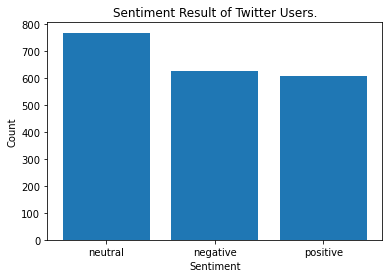

In [28]:
import matplotlib.pyplot as plt

sentiment_counts=df['Sentiment'].value_counts()
labels=sentiment_counts.index
counts=sentiment_counts.values

plt.bar(labels, counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title("Sentiment Result of Twitter Users.")
plt.show()

In [29]:
df.to_csv('Tweet.csv',index=False)